In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [100]:
df_rf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df_rf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [101]:
df_rf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [102]:
df_rf.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Exploratory Data Analysis

In [103]:
df_rf.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [104]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

here we can observe that there are datatypes such as object and float

In [105]:
# lets find the null values
df_rf.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

here we can see many null values in the column we have to fill null values with mean for float and with mode in object datatype

In [106]:
df_rf.nunique().to_frame("No. of Unique values")

,No. of Unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


In [107]:
for column in df_rf.columns:
    unique_count = df_rf[column].nunique()
    unique_values = df_rf[column].unique()
    
    print(f"Column: {column}")
    print(f"Number of Unique Values: {unique_count}")
    print(f"Unique Values: {unique_values}\n")

Column: Date
Number of Unique Values: 3004
Unique Values: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']

Column: Location
Number of Unique Values: 12
Unique Values: ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']

Column: MinTemp
Number of Unique Values: 285
Unique Values: [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6 

In [108]:
df_r=df_rf

In [109]:
#filling the NaN values with mean and mode method
#As we can see that Evaporation and Sunshine have Nan values near to 45% but they seeems important in dataset so we willl keep in the dataset 


num_col=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']

cat_col=['Location','WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']

for col in num_col:
    df_r[col].fillna(df_r[col].mean(),inplace=True)
    
for col in cat_col:
    df_r[col].fillna(df_r[col].mode()[0],inplace=True)
    

In [110]:
df_r.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

We have cleared all the null values

In [111]:
#NOw converting the date from object to datetime function
df_r['Date']=pd.to_datetime(df_r['Date'])

print(df_r['Date'].dtype)

datetime64[ns]


In [112]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8425 non-null   float64       
 3   MaxTemp        8425 non-null   float64       
 4   Rainfall       8425 non-null   float64       
 5   Evaporation    8425 non-null   float64       
 6   Sunshine       8425 non-null   float64       
 7   WindGustDir    8425 non-null   object        
 8   WindGustSpeed  8425 non-null   float64       
 9   WindDir9am     8425 non-null   object        
 10  WindDir3pm     8425 non-null   object        
 11  WindSpeed9am   8425 non-null   float64       
 12  WindSpeed3pm   8425 non-null   float64       
 13  Humidity9am    8425 non-null   float64       
 14  Humidity3pm    8425 non-null   float64       
 15  Pressure9am    8425 n

our first target variable is RainTomorrow which have two values of yes and no and its referred as binary classification model 
and Rainfall is second target varible which is having continues valus also can be modelled by classification or regression

In [113]:
df_r.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,2012-08-05 10:18:43.798219520,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
min,2008-12-01 00:00:00,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,2010-07-13 00:00:00,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,2011-12-24 00:00:00,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,2014-09-11 00:00:00,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,2017-06-25 00:00:00,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000
std,NaN,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849


here we can observe that median is almost equal to the mean but in columns like rainfall ,Evaporation, WindGustspeed ,WindSpeed3pm there is large gap between max value and the 75th percentile so there are the chances of the outliers in the columns

RainTomorrow
No     6434
Yes    1991
Name: count, dtype: int64


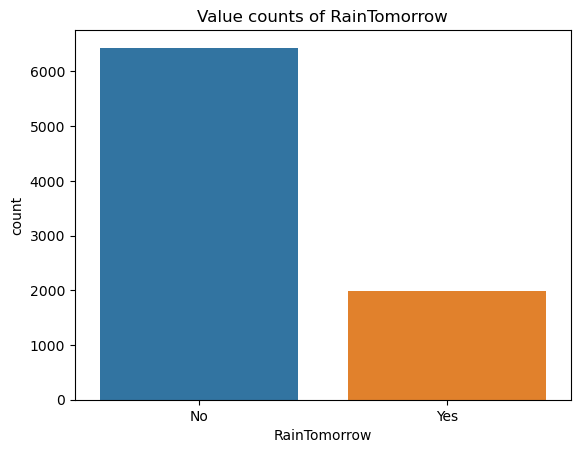

In [114]:
#find the value count of the Rain tomorrow column

print(df_r['RainTomorrow'].value_counts())

plt.title('Value counts of RainTomorrow')
sns.countplot(x='RainTomorrow',data=df_r)
plt.show()

here we can see class imbalance between the labels

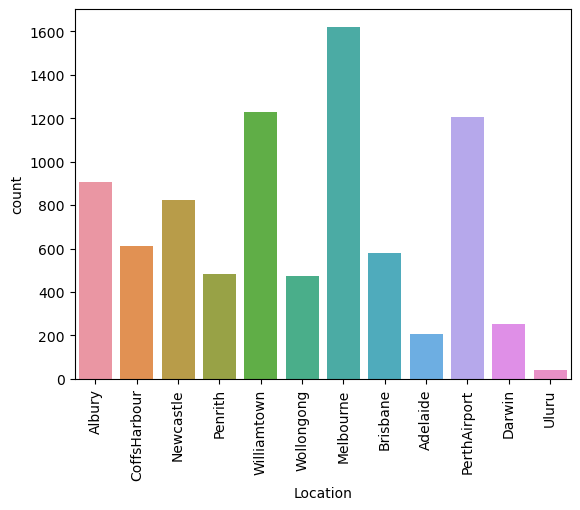

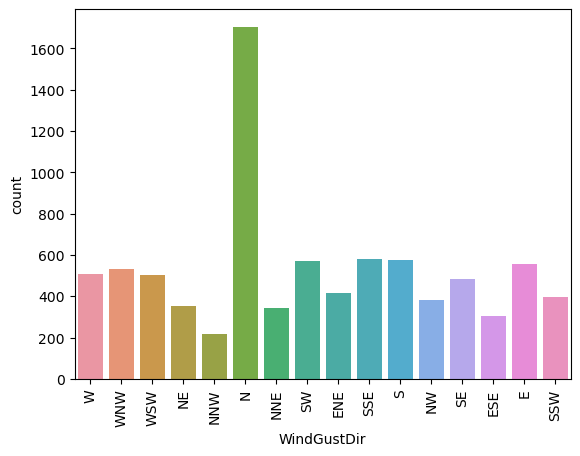

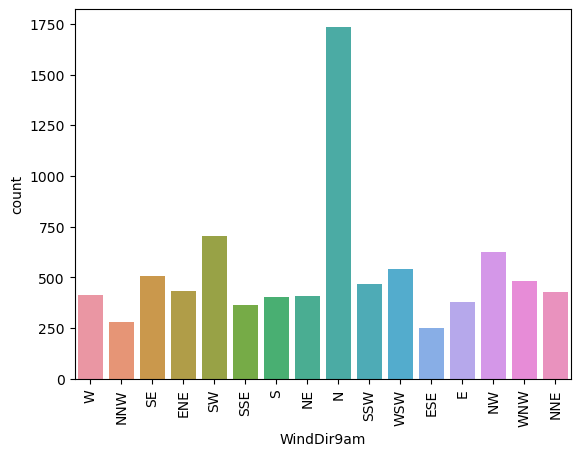

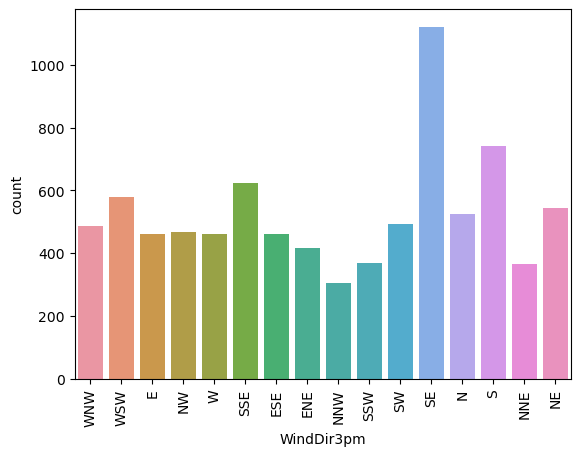

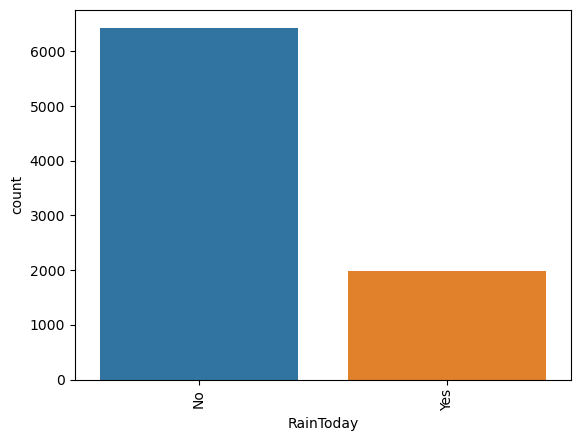

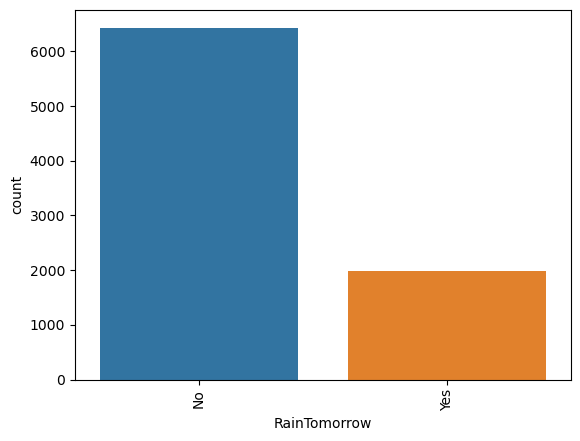

In [115]:
#countplot for categorical of Categorical columns

cat_col=['Location','WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']


for i in cat_col:
    sns.countplot(x=i,data=df_r)
    plt.xticks(rotation=90)
    plt.show()

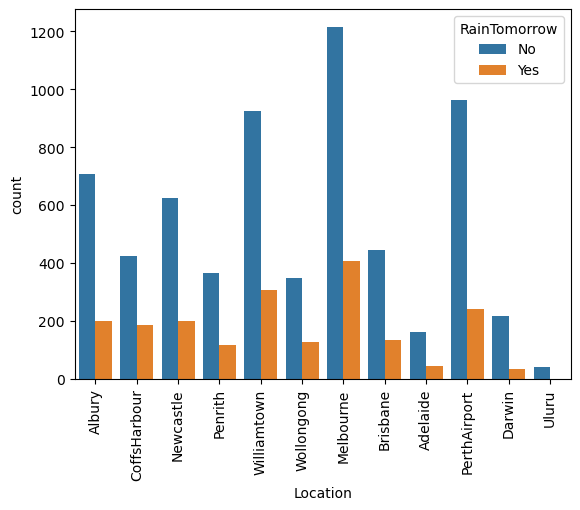

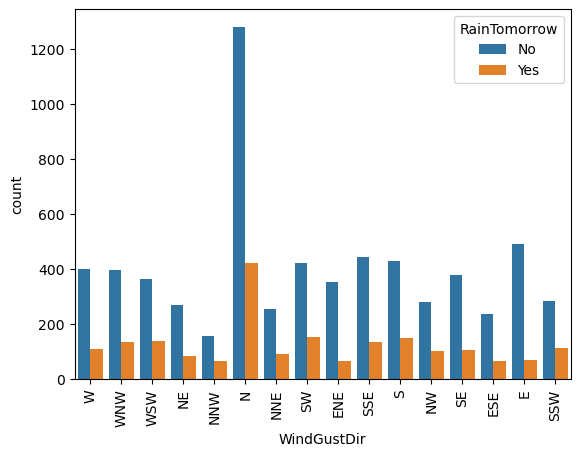

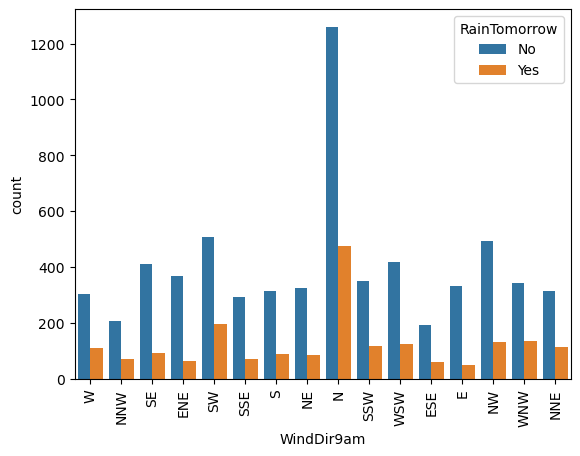

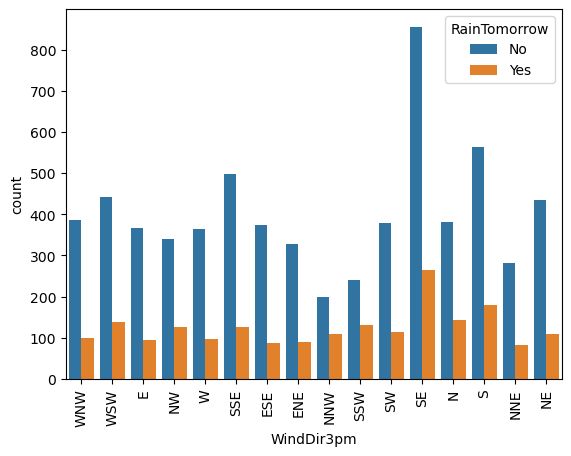

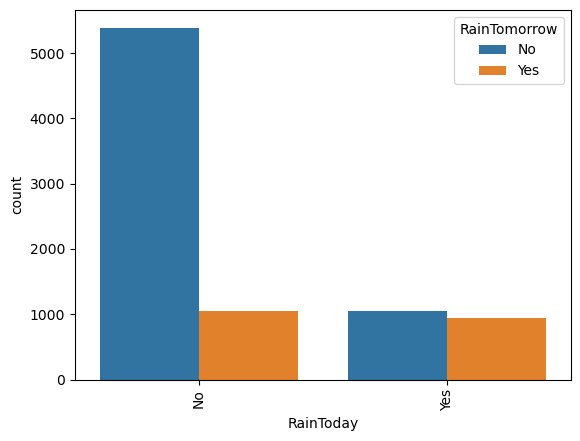

In [116]:
#countplot for categorical of Categorical columns with Rain Tomorrow

cat_col1=['Location','WindGustDir','WindDir9am', 'WindDir3pm','RainToday']


for i in cat_col1:
    sns.countplot(x=i,hue='RainTomorrow',data=df_r)
    plt.xticks(rotation=90)
    plt.show()

1. we can observe that windgustDir if flowing from N then and its maximum from North as compared to the others then there are the chances of the raintomorrow
2. we can observe that windDir9am flowing from the North indicates rain will fall tomorrow
3. we can observe that windDir3pm flowing from the southeaxt indicates at maximum  rain will fall tomorrow
4. we can obsere that if rain is falled today then there are maximum chances that rain will fall tomorrow

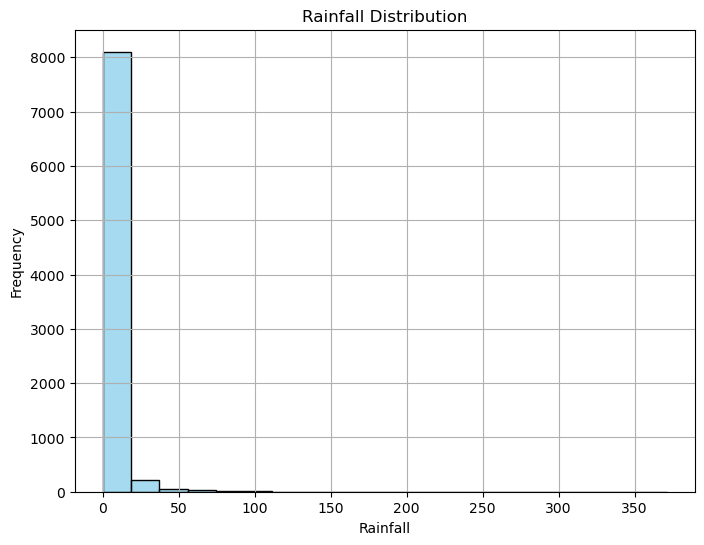

In [117]:
plt.figure(figsize=(8,6))
sns.histplot(df_r['Rainfall'], bins=20, kde=False, color='skyblue')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Rainfall Distribution')
plt.grid(True)

in above historam we can observe that frequency of the rainfall is maximum between 0 to 20 

Text(0, 0.5, 'Rainfall')

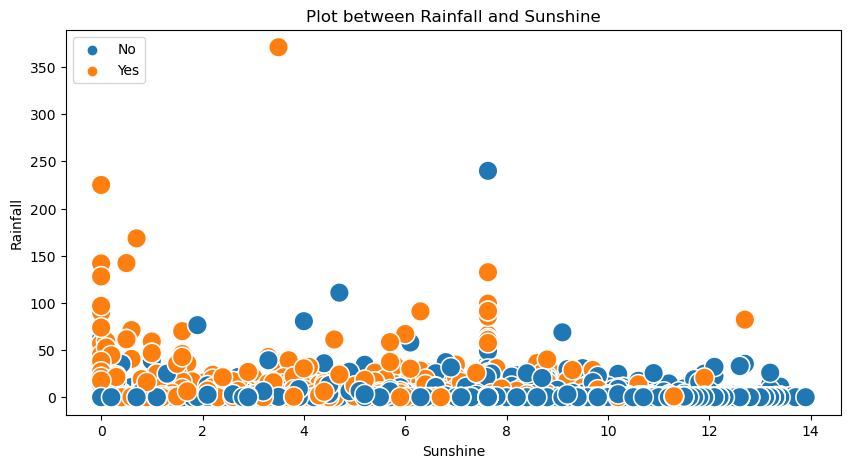

In [118]:
plt.figure(figsize=(10,5))
plt.title('Plot between Rainfall and Sunshine')
sns.scatterplot(x=df_r['Sunshine'], y=df_r['Rainfall'], hue=df_r['RainTomorrow'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Sunshine')
plt.ylabel("Rainfall")

here we can observe that if the sunshine is less than 8 there is maximum that day rain will upto 150mm and also the rain will fall tomorrow if sunshine is less

Text(0, 0.5, 'Rainfall')

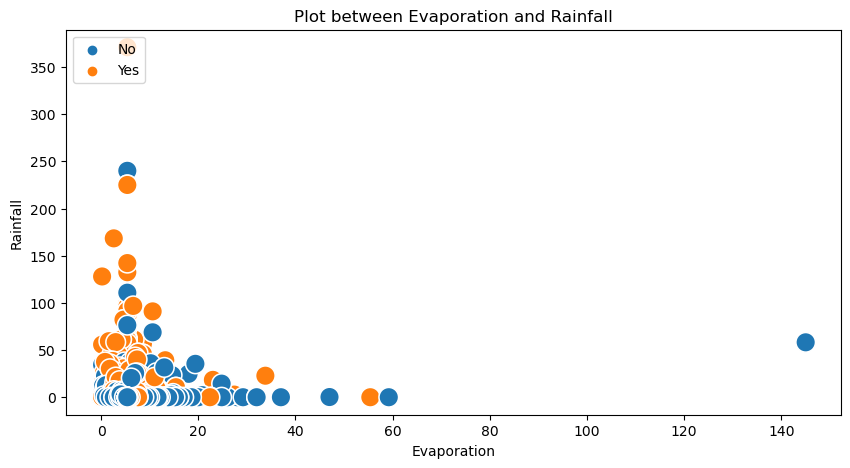

In [119]:
plt.figure(figsize=(10,5))
plt.title('Plot between Evaporation and Rainfall')
sns.scatterplot(x=df_r['Evaporation'], y=df_r['Rainfall'], hue=df_r['RainTomorrow'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Evaporation')
plt.ylabel("Rainfall")

If Evaporation is less then 15 then there are maximum chance of rainfall tomorrow

Text(0, 0.5, 'Rainfall')

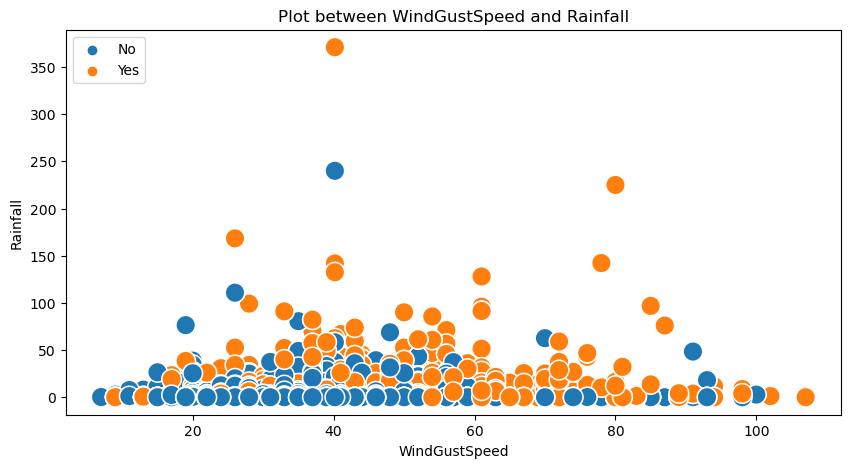

In [120]:
plt.figure(figsize=(10,5))
plt.title('Plot between WindGustSpeed and Rainfall')
sns.scatterplot(x=df_r['WindGustSpeed'], y=df_r['Rainfall'], hue=df_r['RainTomorrow'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('WindGustSpeed')
plt.ylabel("Rainfall")

Text(0, 0.5, 'WindSpeed3pm')

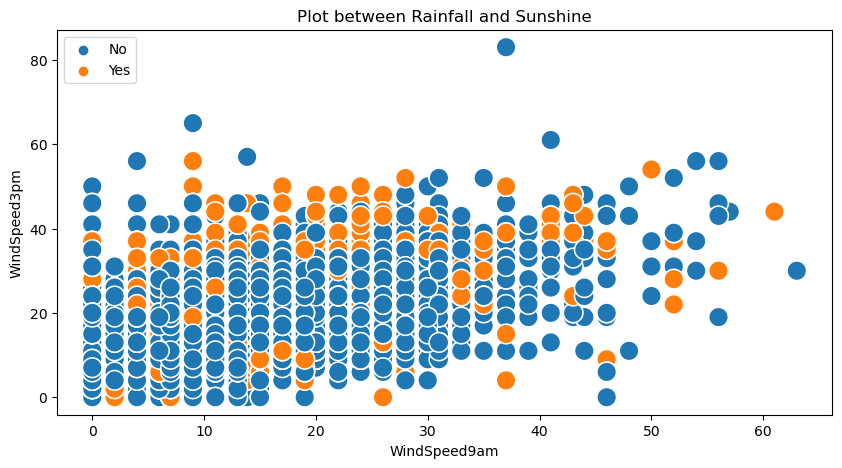

In [121]:
plt.figure(figsize=(10,5))
plt.title('Plot between Rainfall and Sunshine')
sns.scatterplot(x=df_r['WindSpeed9am'],y=df_r['WindSpeed3pm'], hue=df_r['RainTomorrow'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('WindSpeed9am')
plt.ylabel("WindSpeed3pm")

here we can observe that rain will fall tomorrow if the windspeed at 3 pm is more then 25 and if windSpeed at 9 am is more than 

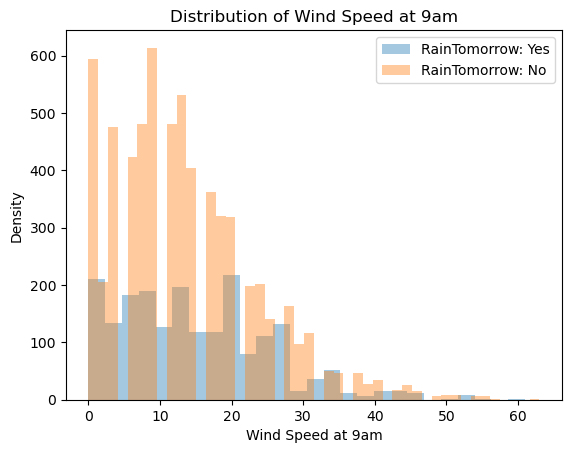

In [122]:
sns.distplot(df_r[df_r['RainTomorrow'] == 'Yes']['WindSpeed9am'], label='RainTomorrow: Yes', kde=False)
sns.distplot(df_r[df_r['RainTomorrow'] == 'No']['WindSpeed9am'], label='RainTomorrow: No', kde=False)

plt.title('Distribution of Wind Speed at 9am')
plt.xlabel('Wind Speed at 9am')
plt.ylabel('Density')
plt.legend()
plt.show()

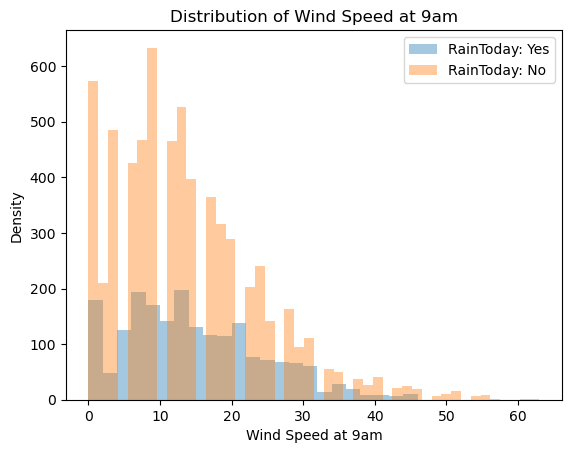

In [123]:
sns.distplot(df_r[df_r['RainToday'] == 'Yes']['WindSpeed9am'], label='RainToday: Yes', kde=False)
sns.distplot(df_r[df_r['RainToday'] == 'No']['WindSpeed9am'], label='RainToday: No', kde=False)

plt.title('Distribution of Wind Speed at 9am')
plt.xlabel('Wind Speed at 9am')
plt.ylabel('Density')
plt.legend()
plt.show()

checking the outliers

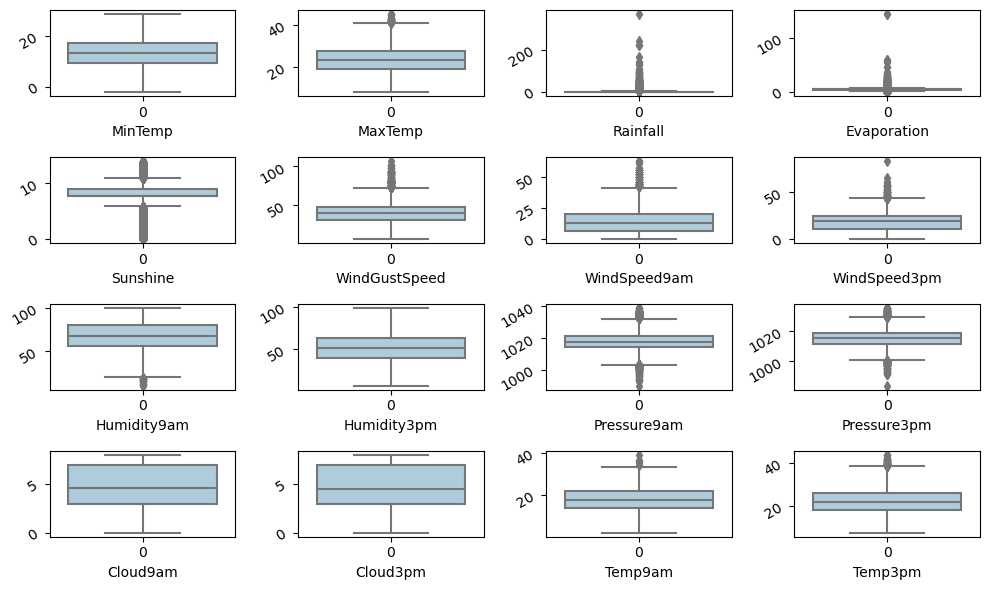

In [124]:
#checking for the outliers:-
#lets check the outliers by plotting the boxplot

plt.figure(figsize=(10,6))
plotnumber=1
for col in num_col:
    if plotnumber<= len(num_col):
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_r[col],palette="Paired")
        plt.xlabel(col,fontsize=10)
        plt.yticks(rotation=30,fontsize=10)
        plotnumber+=1
plt.tight_layout()
plt.show()

Except Mintemp,Humidity3pm ,Cloud9am and Cloud3pm there is outlers in all data set

In [125]:
# drop the date and location column from the dataset as they did not look so important

df_r=df_r.drop(columns=['Date','Location'],axis=1)
df_r.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


as our target varibles are Rainfall and Raintomorrow we will not outliers from the column and from categorical columns

In [126]:
from scipy import stats
# Calculate the Z-Scores for each numerical attribute
num= df_r.drop(['Rainfall','RainTomorrow'], axis=1).select_dtypes(include=['number']).columns
z_scores=np.abs(stats.zscore(df_r[num]))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
df_r1=df_r[~outliers]
df_r1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [127]:
#shape of new and old dataframe
print('old Dataframa--',df_r.shape[0])
print('New DataFrame--',df_r1.shape[0])

old Dataframa-- 8425
New DataFrame-- 8095


In [128]:
print(((df_r.shape[0]-df_r1.shape[0])/df_r.shape[0])*100)

3.9169139465875373


the data loss is less and its only 3.91%

In [129]:
#Encoding categorical columns using ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_r1.columns:
    if df_r1[i].dtypes=='object':
        df_r1[i]=OE.fit_transform(df_r1[i].values.reshape(-1,1))
df_r1                             
          

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,7.8,27.000000,0.0,5.389395,7.632205,9.0,28.000000,10.0,3.0,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [130]:
df_r1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8095 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8095 non-null   float64
 1   MaxTemp        8095 non-null   float64
 2   Rainfall       8095 non-null   float64
 3   Evaporation    8095 non-null   float64
 4   Sunshine       8095 non-null   float64
 5   WindGustDir    8095 non-null   float64
 6   WindGustSpeed  8095 non-null   float64
 7   WindDir9am     8095 non-null   float64
 8   WindDir3pm     8095 non-null   float64
 9   WindSpeed9am   8095 non-null   float64
 10  WindSpeed3pm   8095 non-null   float64
 11  Humidity9am    8095 non-null   float64
 12  Humidity3pm    8095 non-null   float64
 13  Pressure9am    8095 non-null   float64
 14  Pressure3pm    8095 non-null   float64
 15  Cloud9am       8095 non-null   float64
 16  Cloud3pm       8095 non-null   float64
 17  Temp9am        8095 non-null   float64
 18  Temp3pm      

In [131]:
#checking the correlation betweeen features and the target
cor=df_r1.corr()
cor

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.715527,0.090879,0.370858,0.055313,-0.153312,0.231050,-0.043406,-0.155134,0.144742,...,-0.117147,0.097472,-0.432528,-0.426595,0.096184,0.043581,0.887828,0.684359,0.072772,0.097085
MaxTemp,0.715527,1.000000,-0.083761,0.466203,0.383708,-0.235936,0.132502,-0.217509,-0.191687,0.009248,...,-0.381825,-0.408248,-0.333274,-0.414642,-0.252614,-0.247465,0.863943,0.974833,-0.220169,-0.150898
Rainfall,0.090879,-0.083761,1.000000,-0.039825,-0.167560,0.036598,0.082620,0.090789,0.035329,0.059333,...,0.223853,0.234243,-0.054897,-0.013731,0.182583,0.151334,-0.002701,-0.087848,0.456575,0.218067
Evaporation,0.370858,0.466203,-0.039825,1.000000,0.363056,-0.120358,0.199600,-0.112451,-0.034938,0.139666,...,-0.319535,-0.229237,-0.260710,-0.274448,-0.112576,-0.144041,0.436838,0.452332,-0.157491,-0.087288
Sunshine,0.055313,0.383708,-0.167560,0.363056,1.000000,-0.104989,0.002044,-0.079076,-0.067690,-0.011599,...,-0.374313,-0.444715,-0.000862,-0.061617,-0.530969,-0.544899,0.254414,0.399920,-0.234019,-0.324472
WindGustDir,-0.153312,-0.235936,0.036598,-0.120358,-0.104989,1.000000,0.006792,0.404689,0.507185,0.049787,...,0.030921,0.049578,-0.096903,-0.010388,0.121865,0.092719,-0.184448,-0.247918,0.120523,0.042947
WindGustSpeed,0.231050,0.132502,0.082620,0.199600,0.002044,0.006792,1.000000,-0.066830,0.076963,0.579656,...,-0.254248,-0.077156,-0.375381,-0.333378,0.018975,0.068787,0.196482,0.097839,0.082752,0.185836
WindDir9am,-0.043406,-0.217509,0.090789,-0.112451,-0.079076,0.404689,-0.066830,1.000000,0.245617,0.083615,...,0.014449,0.119772,-0.004061,0.081765,0.095530,0.063381,-0.102193,-0.224366,0.154400,0.031332
WindDir3pm,-0.155134,-0.191687,0.035329,-0.034938,-0.067690,0.507185,0.076963,0.245617,1.000000,0.041546,...,-0.006699,-0.009685,-0.129253,-0.036654,0.072076,0.051984,-0.174254,-0.203442,0.099331,0.003747
WindSpeed9am,0.144742,0.009248,0.059333,0.139666,-0.011599,0.049787,0.579656,0.083615,0.041546,1.000000,...,-0.348640,-0.097630,-0.150235,-0.103677,0.000602,0.048114,0.107759,-0.006088,0.051271,0.063049


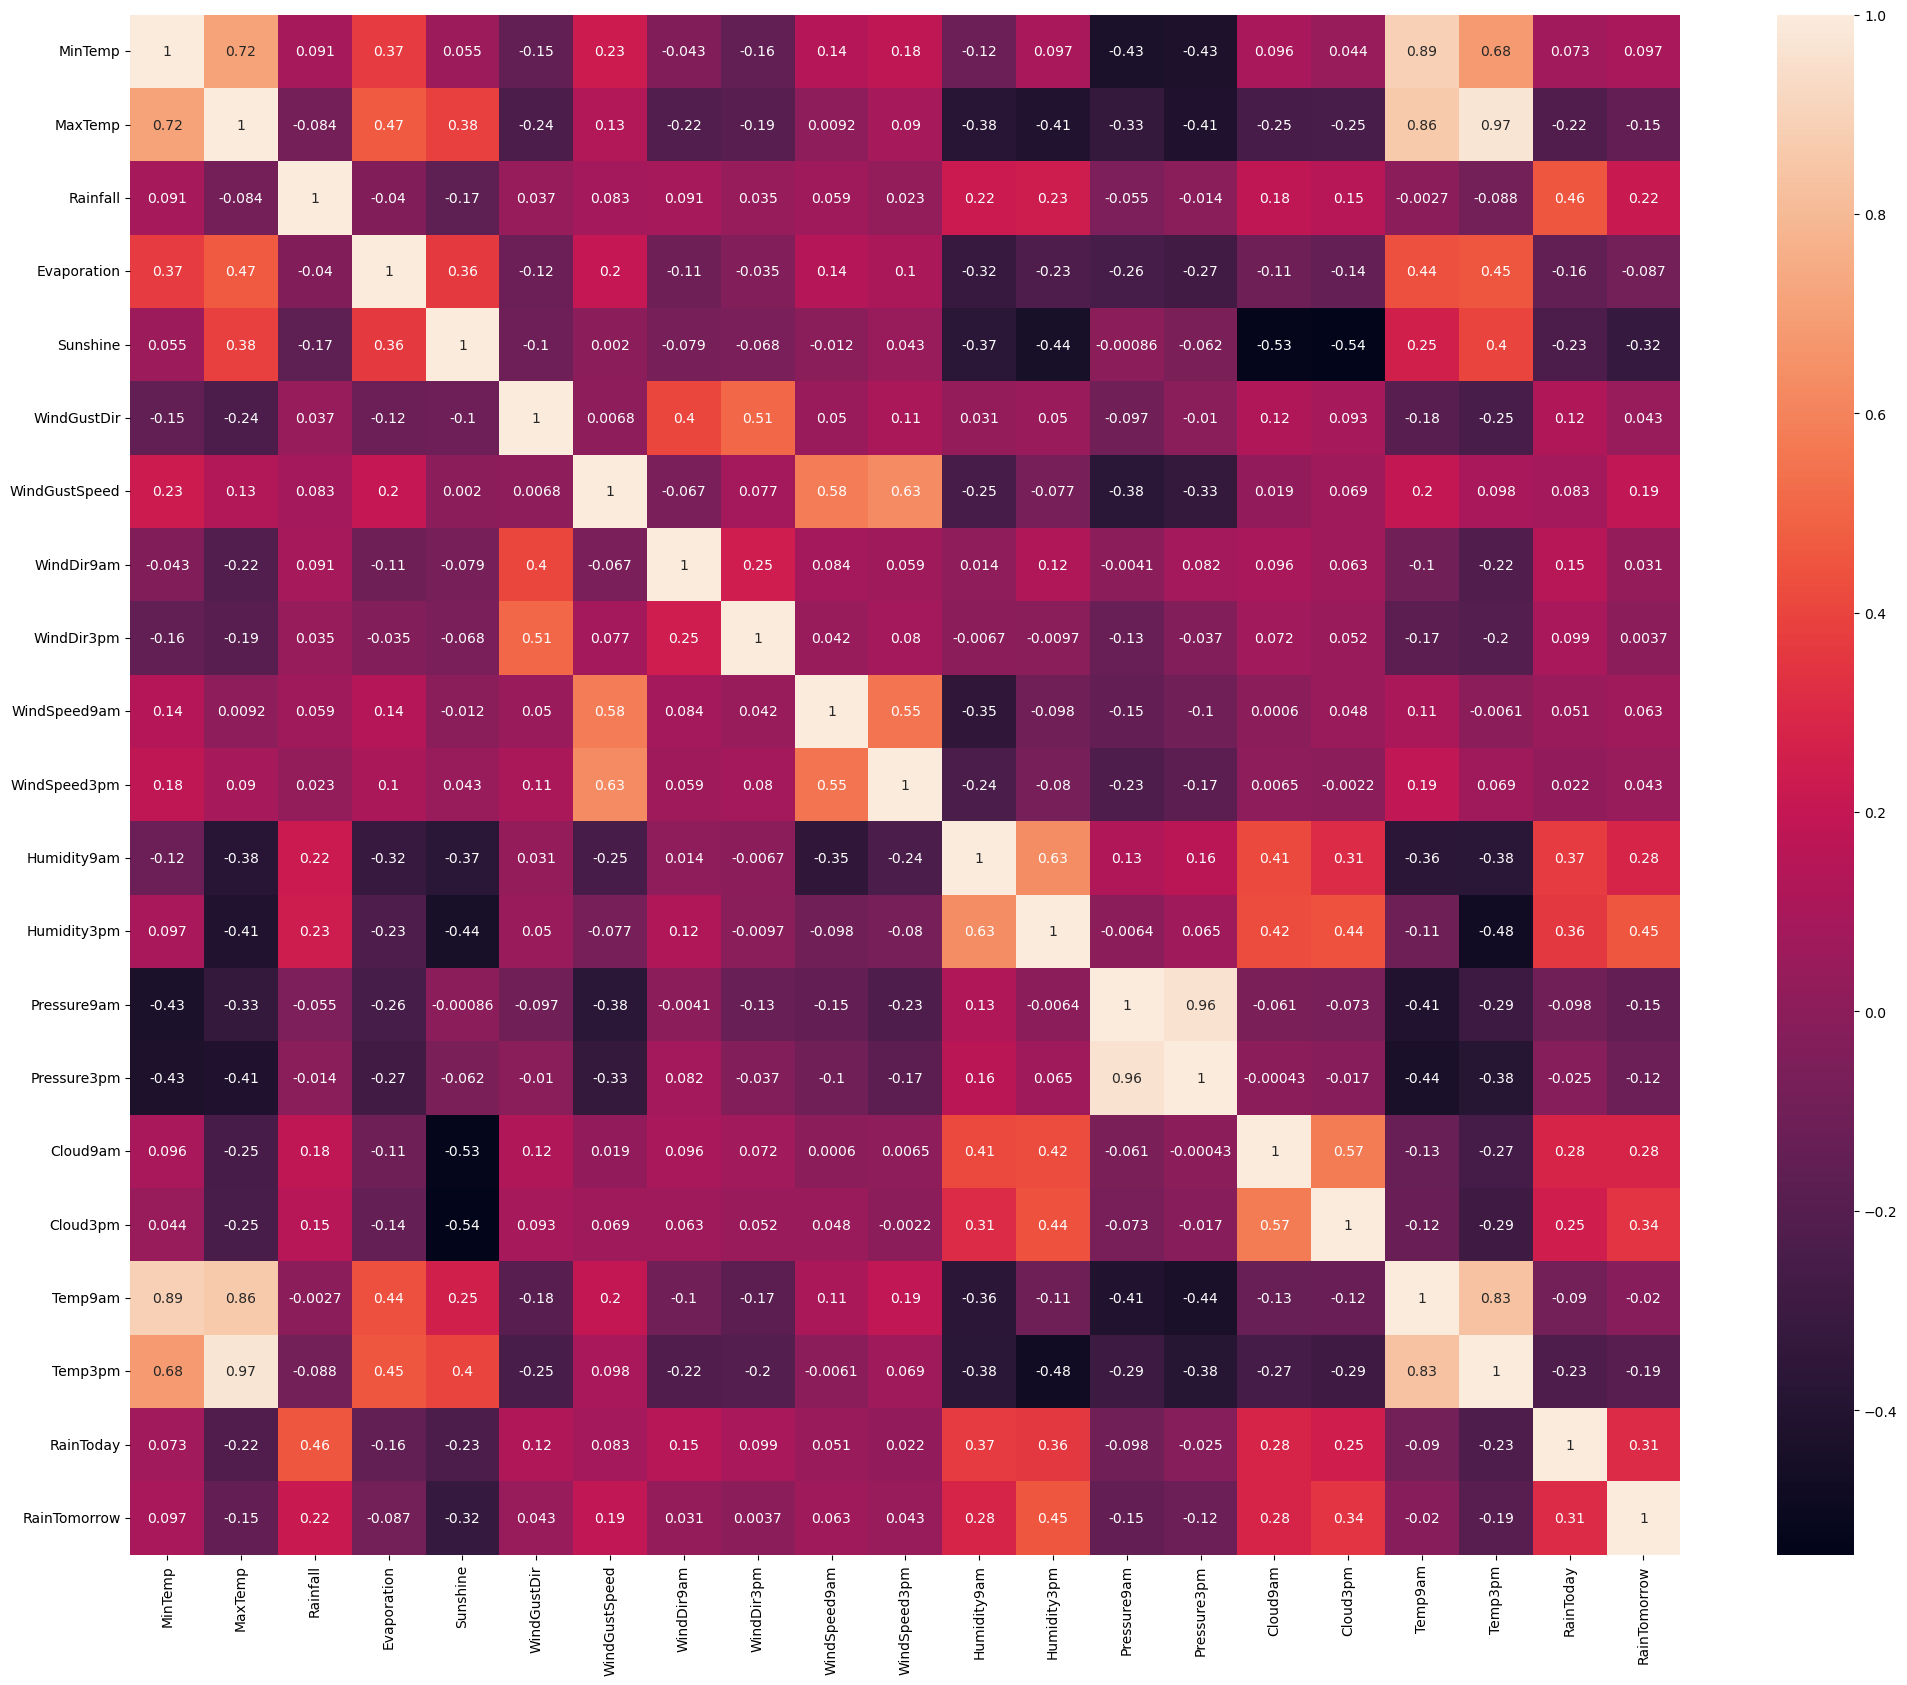

In [132]:
#visualizing the correlation matrix by plotting  heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df_r1.corr(),annot=True)
plt.yticks(rotation=0)
plt.show()

the min and max temp is highly correlated in the dataset 

In [136]:
# Splitting the dataset into train and test sets
X = df_r1.drop(['Rainfall','RainTomorrow'], axis=1)


In [141]:
y = df_r1[['RainTomorrow','Rainfall']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [148]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [149]:
#RandomForestRegressor
rf =RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1.0537297722616181
MSE: 51.17007545043053
RMSE: 7.1533261809056725


In [150]:
# training the models

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 1.5896651152484005
MSE: 53.81683961345102
RMSE: 7.335996156859069
